In [1]:
import cv2 as cv
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams["figure.figsize"]=[5,5]

In [2]:
figuras=cv.imread("imagenes/figuras.png")
figuras=cv.cvtColor(figuras, cv.COLOR_BGRA2RGB)
cv.imwrite("imagenes/figuras.jpg",figuras)
figuras=cv.imread("imagenes/figuras.jpg")
gray=cv.cvtColor(figuras, cv.COLOR_RGB2GRAY)

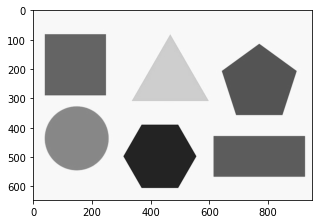

In [3]:
plt.imshow(gray, cmap="gray")

In [70]:
cv.imshow("figuras",grayb)
cv.waitKey(0)
cv.destroyWindow("figuras")

In [69]:
threhold, grayb=cv.threshold(gray, 240, 255, cv.THRESH_BINARY_INV)

In [4]:
def histograma(gray, hxb=False, hyb=False):
    histx=[]
    histy=[]
    if hyb:
        for row in gray:
            histy.append(sum(row))
    if hxb:
        for col in gray.T:
            histx.append(sum(col))
    return histx, histy

In [73]:
hx, hy=histograma(grayb, hxb=True, hyb=True)

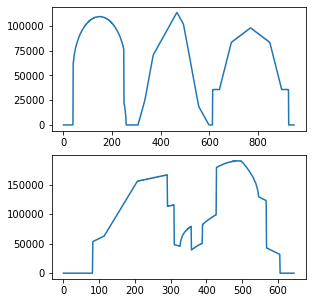

In [74]:
fig=plt.figure(figsize=(10,5))
pltx=fig.add_subplot(221)
plty=fig.add_subplot(223)
pltx.plot(hx)
plty.plot(hy)

In [ ]:
hxbin=[h>30 for h in hx]
hybin=[h>30 for h in hy]
fig=plt.figure(figsize=(10,5))
pltx=fig.add_subplot(221)
plty=fig.add_subplot(223)
pltx.plot(hxbin)
plty.plot(hybin)

In [5]:
def cortes(hbin):
    v_ant=hbin[0]
    cortes_index=[]
    for index, h in enumerate(hbin):
        v_sig=h
        if v_sig!=v_ant:
            cortes_index.append(index)
        v_ant=v_sig
    return cortes_index, len(cortes_index)

In [ ]:
corte, tam= cortes(hxbin)
print(corte, tam)
corte, tam= cortes(hybin)
print(corte, tam)

In [ ]:
cortex, tamx= cortes(hxbin)
cortey, tamy= cortes(hybin)

In [ ]:
print("x gana") if tamx>tamy else print("a pirde")

In [39]:
def corte_val(corte, tam, th_corte):
    corte_vals=[]
    tam_v=0
    for i, dat in enumerate(range(int(tam/2))):
        len_corte=corte[2*i+1]-corte[2*i]
        corte_vals.append([corte[2*i]-10,corte[2*i+1]+10]) if len_corte>th_corte else _
        tam_v+=1*(len_corte>30)
    return corte_vals, tam_v

In [ ]:
corte_v, tam=corte_val(cortex, tamx)

In [ ]:
for i in range(tam):
    img_c=grayb[:,corte_v[i][0]:corte_v[i][1]]

In [93]:
def extract_objects(gray_image, threshold=240, th_corte=30):
    figuras=[]
    threhold, gray_image_bool=cv.threshold(gray, 240, 255, cv.THRESH_BINARY_INV)
    hx, hy=histograma(gray_image_bool, hxb=True, hyb=True)
    hxbin=[h>30 for h in hx]
    hybin=[h>30 for h in hy]

    cortex, tamx= cortes(hxbin)
    cortey, tamy= cortes(hybin)

    b_h=tamx>tamy
    corte_v, tam_v=corte_val(cortex, tamx, th_corte) if b_h else corte_val(cortey, tamy, th_corte)
    for i in range(tam_v):
        img_c=gray_image_bool[:,corte_v[i][0]:corte_v[i][1]] if b_h else gray_image_bool.T[:,corte_v[i][0]:corte_v[i][1]]
        hx, hy=histograma(img_c, hxb=False, hyb=True)
        hybin=[h>30 for h in hy]
        cortey, tamy= cortes(hybin)
        corte, tam= corte_val(cortey, tamy, th_corte)
        print(corte)
        print(tam)
        for j in range(tam):
            figuras.append(img_c[corte[j][0]:corte[j][1],:])
    return figuras

In [94]:
figuras=extract_objects(gray, threshold=240, th_corte=30)

[[72, 301], [317, 556]]
2
[[73, 320], [379, 616]]
2
[[105, 368], [418, 578]]
2


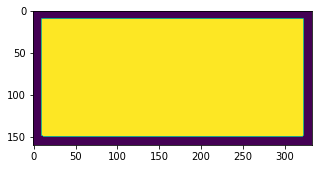

In [100]:
plt.imshow(figuras[5][:])

In [103]:
from ipywidgets import interact, IntSlider

In [109]:
@interact(numero=IntSlider(6,min=1,max=6))
def mostrar_imagenes(numero):
    plt.imshow(figuras[numero-1][:])

interactive(children=(IntSlider(value=6, description='numero', max=6, min=1), Output()), _dom_classes=('widget…